<a href="https://colab.research.google.com/github/rifatkhan545/Machine-Learning/blob/main/btockmarket_bit(stock_price_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas_datareader as pdr

In [ ]:
key = 'e034eca01711f06d5c0a6ded6ca2fd26fbdc0139'

In [ ]:
df = pdr.get_data_tiingo('BITCF', api_key = key)

In [ ]:
df.to_csv('bitcf.csv')

In [ ]:
df = pd.read_csv('bitcf.csv')

In [ ]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,BITCF,2015-11-27 00:00:00+00:00,0.0022,0.0022,0.0022,0.0022,0,0.0022,0.0022,0.0022,0.0022,0,0.0,1.0
1,BITCF,2015-11-30 00:00:00+00:00,0.0012,0.0012,0.0012,0.0012,1000,0.0012,0.0012,0.0012,0.0012,1000,0.0,1.0
2,BITCF,2015-12-01 00:00:00+00:00,0.0026,0.0026,0.0012,0.0012,16346,0.0026,0.0026,0.0012,0.0012,16346,0.0,1.0
3,BITCF,2015-12-02 00:00:00+00:00,0.0026,0.0026,0.0026,0.0026,0,0.0026,0.0026,0.0026,0.0026,0,0.0,1.0
4,BITCF,2015-12-03 00:00:00+00:00,0.0026,0.0026,0.0026,0.0026,0,0.0026,0.0026,0.0026,0.0026,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,BITCF,2020-11-17 00:00:00+00:00,0.1300,0.1340,0.1000,0.1340,49117,0.1300,0.1340,0.1000,0.1340,49117,0.0,1.0
1251,BITCF,2020-11-18 00:00:00+00:00,0.1200,0.1395,0.1100,0.1100,41521,0.1200,0.1395,0.1100,0.1100,41521,0.0,1.0
1252,BITCF,2020-11-19 00:00:00+00:00,0.1300,0.1300,0.0500,0.1100,245216,0.1300,0.1300,0.0500,0.1100,245216,0.0,1.0
1253,BITCF,2020-11-20 00:00:00+00:00,0.1200,0.1300,0.1100,0.1300,54763,0.1200,0.1300,0.1100,0.1300,54763,0.0,1.0


In [ ]:
df1 = df.reset_index()['close']

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,BITCF,2015-11-27 00:00:00+00:00,0.0022,0.0022,0.0022,0.0022,0,0.0022,0.0022,0.0022,0.0022,0,0.0,1.0
1,BITCF,2015-11-30 00:00:00+00:00,0.0012,0.0012,0.0012,0.0012,1000,0.0012,0.0012,0.0012,0.0012,1000,0.0,1.0
2,BITCF,2015-12-01 00:00:00+00:00,0.0026,0.0026,0.0012,0.0012,16346,0.0026,0.0026,0.0012,0.0012,16346,0.0,1.0
3,BITCF,2015-12-02 00:00:00+00:00,0.0026,0.0026,0.0026,0.0026,0,0.0026,0.0026,0.0026,0.0026,0,0.0,1.0
4,BITCF,2015-12-03 00:00:00+00:00,0.0026,0.0026,0.0026,0.0026,0,0.0026,0.0026,0.0026,0.0026,0,0.0,1.0


In [ ]:
import matplotlib.pyplot as plt

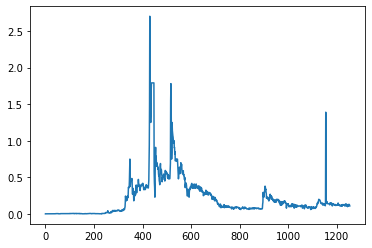

In [ ]:
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
df1 = scalar.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1.shape

(1255, 1)

In [ ]:
train_size = int(len(df1)*0.65)

In [ ]:
test_size = len(df1) -train_size

In [ ]:
train_data, test_data = df1[0:train_size,:], df1[train_size:len(df1),:1]

In [ ]:
train_size, test_size

(815, 440)

In [ ]:
import numpy
def create_dataset(dataset, time_step = 1):
    dataX, dataY  = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(714, 100)
(714,)


(None, None)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [ ]:
import tensorflow 
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=200, batch_size=64, verbose=1)

Epoch 1/200
12/12 [==============================] - 1s 95ms/step - loss: 0.0128 - val_loss: 7.1380e-04
Epoch 2/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0078 - val_loss: 7.5864e-04
Epoch 3/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0075 - val_loss: 0.0026
Epoch 4/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0059 - val_loss: 7.3285e-04
Epoch 5/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0050 - val_loss: 9.5865e-04
Epoch 6/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0045 - val_loss: 9.0691e-04
Epoch 7/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0040 - val_loss: 9.1418e-04
Epoch 8/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0039 - val_loss: 8.1580e-04
Epoch 9/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0038 - val_loss: 7.5754e-04
Epoch 10/200
12/12 [==============================] - 0s 20ms/step -

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
train_predict

array([[-1.07836910e-03],
       [-1.10190082e-03],
       [-4.31357883e-04],
       [-1.49767846e-04],
       [-1.01805665e-04],
       [-5.28376549e-04],
       [-7.48828985e-04],
       [-8.12952407e-04],
       [-6.20610081e-04],
       [-5.34049235e-04],
       [-5.42303547e-04],
       [-5.18000685e-04],
       [-3.51454131e-04],
       [-2.42678449e-04],
       [-2.16436572e-04],
       [-2.31097452e-04],
       [-2.53558159e-04],
       [-2.71171331e-04],
       [-2.82651745e-04],
       [-1.06203277e-03],
       [-1.63599849e-03],
       [-1.95656531e-03],
       [-1.24906097e-03],
       [-6.08842820e-04],
       [-3.13295983e-04],
       [-3.42630781e-04],
       [-4.16943803e-04],
       [-4.44525853e-04],
       [-4.36807983e-04],
       [-1.22040138e-03],
       [-1.14000123e-03],
       [-8.49386677e-04],
       [-6.73257746e-04],
       [-6.22618943e-04],
       [-6.57299533e-04],
       [-6.97104260e-04],
       [-7.19469041e-04],
       [-7.29718246e-04],
       [-7.1

In [ ]:
test_predict

array([[0.06498493],
       [0.06624127],
       [0.06030457],
       [0.0679433 ],
       [0.0748658 ],
       [0.07832359],
       [0.06926311],
       [0.06832788],
       [0.07762799],
       [0.09259708],
       [0.10664978],
       [0.11035667],
       [0.11512594],
       [0.10003026],
       [0.09844707],
       [0.09979759],
       [0.09921135],
       [0.0798148 ],
       [0.08346131],
       [0.0736568 ],
       [0.07047752],
       [0.06997769],
       [0.06599443],
       [0.0637648 ],
       [0.05644111],
       [0.06071782],
       [0.05926578],
       [0.05309086],
       [0.0497153 ],
       [0.05435168],
       [0.06425331],
       [0.0582173 ],
       [0.05839957],
       [0.0679654 ],
       [0.07150327],
       [0.06653267],
       [0.06556316],
       [0.06163271],
       [0.07335722],
       [0.07986204],
       [0.07687133],
       [0.07353905],
       [0.0718797 ],
       [0.07458094],
       [0.07579346],
       [0.06835689],
       [0.06368215],
       [0.062

In [ ]:
train_predict = scalar.inverse_transform(train_predict)
test_predict = scalar.inverse_transform(test_predict)

In [ ]:
#calculating the performance metrics

In [ ]:
import math
from sklearn.metrics import mean_squared_error


In [ ]:
math.sqrt(mean_squared_error(y_test, test_predict))

0.11879725970568575

In [ ]:
math.sqrt(mean_squared_error(y_train, train_predict))

0.2797656529545791

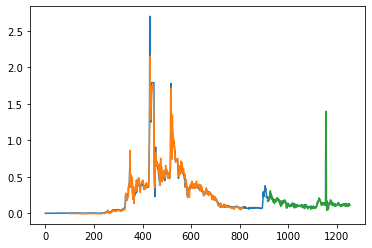

In [ ]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

440

In [ ]:

x_inputs=test_data[340:].reshape(1,-1)
x_inputs.shape

(1, 100)

In [ ]:
test_input =  list(x_inputs)

In [ ]:
test_input

[array([0.51459908, 0.05513562, 0.05513562, 0.05513562, 0.05884097,
        0.06254632, 0.05698829, 0.05291241, 0.05143027, 0.05143027,
        0.05143027, 0.05143027, 0.05143027, 0.05143027, 0.05143027,
        0.05143027, 0.04587224, 0.05513562, 0.05513562, 0.05143027,
        0.05513562, 0.05513562, 0.04772491, 0.04957759, 0.05476508,
        0.05143027, 0.04772491, 0.04031421, 0.04513117, 0.05143027,
        0.05031866, 0.05143027, 0.0506892 , 0.04957759, 0.04587224,
        0.04364903, 0.04401956, 0.0443901 , 0.04401956, 0.04772491,
        0.04309323, 0.04331555, 0.04253742, 0.04587224, 0.04401956,
        0.04401956, 0.04364903, 0.04401956, 0.04364903, 0.04401956,
        0.04587224, 0.05513562, 0.05031866, 0.04401956, 0.04735438,
        0.04735438, 0.04513117, 0.04513117, 0.04068475, 0.04031421,
        0.04031421, 0.04068475, 0.04401956, 0.04401956, 0.04031421,
        0.04401956, 0.03957314, 0.04401956, 0.04031421, 0.04735438,
        0.04401956, 0.04401956, 0.04401956, 0.04

In [ ]:
test_input = test_input[0].tolist()

In [ ]:
test_input

[0.5145990810730694,
 0.05513561582925744,
 0.05513561582925744,
 0.05513561582925744,
 0.05884096635541722,
 0.062546316881577,
 0.05698829109233733,
 0.052912405513561585,
 0.051430265303097675,
 0.051430265303097675,
 0.051430265303097675,
 0.051430265303097675,
 0.051430265303097675,
 0.051430265303097675,
 0.051430265303097675,
 0.051430265303097675,
 0.04587223951385801,
 0.05513561582925744,
 0.05513561582925744,
 0.051430265303097675,
 0.05513561582925744,
 0.05513561582925744,
 0.047724914776937896,
 0.049577590040017785,
 0.05476508077664146,
 0.051430265303097675,
 0.047724914776937896,
 0.040314213724618346,
 0.045131169408626055,
 0.051430265303097675,
 0.05031866014524973,
 0.051430265303097675,
 0.050689195197865716,
 0.049577590040017785,
 0.04587223951385801,
 0.043649029198162145,
 0.04401956425077812,
 0.0443900993033941,
 0.04401956425077812,
 0.047724914776937896,
 0.04309322661923817,
 0.043315547650807765,
 0.04253742404031421,
 0.04587223951385801,
 0.0440195642

In [ ]:


# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(test_input)>100):
        #print(test_input)
        x_inputs=np.array(test_input[1:])
        print("{} day input {}".format(i,x_inputs))
        x_inputs=x_inputs.reshape(1,-1)
        x_inputs = x_inputs.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_inputs, verbose=0)
        print("{} day output {}".format(i,yhat))
        test_input.extend(yhat[0].tolist())
        test_input=test_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_inputs = x_inputs.reshape((1, n_steps,1))
        yhat = model.predict(x_inputs, verbose=0)
        print(yhat[0])
        test_input.extend(yhat[0].tolist())
        print(len(test_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.05513562 0.05513562 0.05513562 0.05884097 0.06254632 0.05698829
 0.05291241 0.05143027 0.05143027 0.05143027 0.05143027 0.05143027
 0.05143027 0.05143027 0.05143027 0.04587224 0.05513562 0.05513562
 0.05143027 0.05513562 0.05513562 0.04772491 0.04957759 0.05476508
 0.05143027 0.04772491 0.04031421 0.04513117 0.05143027 0.05031866
 0.05143027 0.0506892  0.04957759 0.04587224 0.04364903 0.04401956
 0.0443901  0.04401956 0.04772491 0.04309323 0.04331555 0.04253742
 0.04587224 0.04401956 0.04401956 0.04364903 0.04401956 0.04364903
 0.04401956 0.04587224 0.05513562 0.05031866 0.04401956 0.04735438
 0.04735438 0.04513117 0.04513117 0.04068475 0.04031421 0.04031421
 0.04068475 0.04401956 0.04401956 0.04031421 0.04401956 0.03957314
 0.04401956 0.04031421 0.04735438 0.04401956 0.04401956 0.04401956
 0.04401956 0.04728027 0.04401956 0.04698384 0.04735438 0.04031421
 0.04068475 0.04031421 0.04031421 0.04587224 0.05143027 0.04401956
 0.04735438 0.04401956 0.04401956 0.03846154 0.044

In [ ]:

day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1255

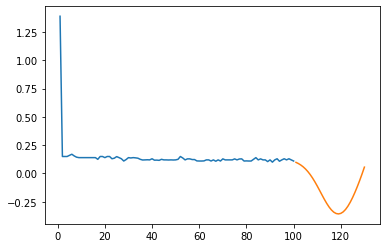

In [ ]:
plt.plot(day_new,scalar.inverse_transform(df1[1155:]))
plt.plot(day_pred,scalar.inverse_transform(lst_output))

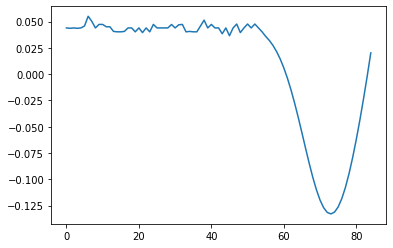

In [ ]:

df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

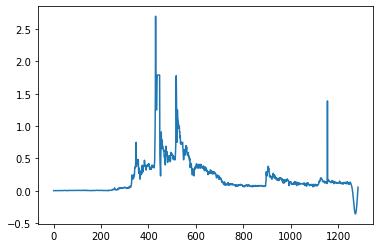

In [ ]:
df3=scalar.inverse_transform(df3).tolist()
plt.plot(df3)